# Import Library

In [ ]:
# to solve the problem of "OMP: Error #15: Initializing libomp.dylib, but found libiomp5.dylib already initialized":

# Method-1: add the following instructions
## import os
##os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# Method-2: do not use MKL (Intel Math Kernel Library) by "conda install nokml"
## ref: https://docs.anaconda.com/mkl-optimizations/

In [2]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt

def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# 資料準備

In [4]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [5]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [6]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [7]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [9]:
# Build the model

def build_model():
    model = Sequential()

    #卷積層1
    model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32,3), activation='relu', padding='same'))
    model.add(Dropout(rate=0.25))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #卷積層2與池化層2
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(Dropout(0.25))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #建立神經網路(平坦層、隱藏層、輸出層)
    model.add(Flatten())
    model.add(Dropout(rate=0.25))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(rate=0.25))
    model.add(Dense(10, activation='softmax'))
    
    return model

In [10]:
model = build_model()

#檢查model 的STACK
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxP

# 訓練模型

# 作業: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate

In [11]:
model = build_model()
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])


'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [12]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)          

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 239s 6ms/step - loss: 0.0898 - acc: 0.1284 - val_loss: 0.0890 - val_acc: 0.2010
Epoch 2/10
40000/40000 [==============================] - 241s 6ms/step - loss: 0.0883 - acc: 0.1770 - val_loss: 0.0879 - val_acc: 0.2382
Epoch 3/10
40000/40000 [==============================] - 238s 6ms/step - loss: 0.0866 - acc: 0.2164 - val_loss: 0.0864 - val_acc: 0.2680
Epoch 4/10
40000/40000 [==============================] - 239s 6ms/step - loss: 0.0846 - acc: 0.2519 - val_loss: 0.0847 - val_acc: 0.2942
Epoch 5/10
40000/40000 [==============================] - 240s 6ms/step - loss: 0.0831 - acc: 0.2785 - val_loss: 0.0834 - val_acc: 0.3162
Epoch 6/10
40000/40000 [==============================] - 305s 8ms/step - loss: 0.0817 - acc: 0.3009 - val_loss: 0.0823 - val_acc: 0.3334
Epoch 7/10
40000/40000 [==============================] - 246s 6ms/step - 

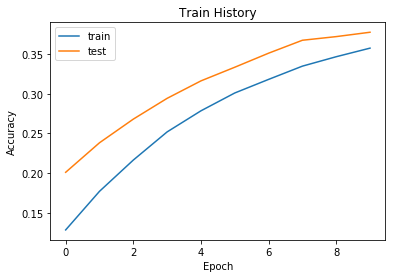

In [13]:
show_train_history('acc','val_acc')

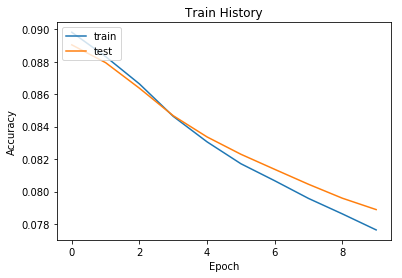

In [14]:
show_train_history('loss','val_loss')

In [15]:
model = build_model()
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [16]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)          

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 1182s 30ms/step - loss: 0.3124 - acc: 0.9000 - val_loss: 0.2990 - val_acc: 0.9000
Epoch 2/10
40000/40000 [==============================] - 236s 6ms/step - loss: 0.2833 - acc: 0.9009 - val_loss: 0.2815 - val_acc: 0.9002
Epoch 3/10
40000/40000 [==============================] - 237s 6ms/step - loss: 0.2670 - acc: 0.9031 - val_loss: 0.2678 - val_acc: 0.9009
Epoch 4/10
40000/40000 [==============================] - 238s 6ms/step - loss: 0.2548 - acc: 0.9050 - val_loss: 0.2578 - val_acc: 0.9014
Epoch 5/10
40000/40000 [==============================] - 236s 6ms/step - loss: 0.2455 - acc: 0.9071 - val_loss: 0.2488 - val_acc: 0.9034
Epoch 6/10
40000/40000 [==============================] - 238s 6ms/step - loss: 0.2384 - acc: 0.9089 - val_loss: 0.2439 - val_acc: 0.9043
Epoch 7/10
40000/40000 [==============================] - 238s 6ms/step - loss: 0.2326 - acc: 0.9103 - val_loss: 0.2376 

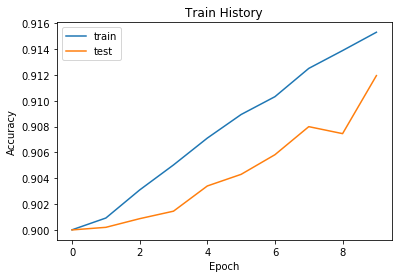

In [17]:
show_train_history('acc','val_acc')

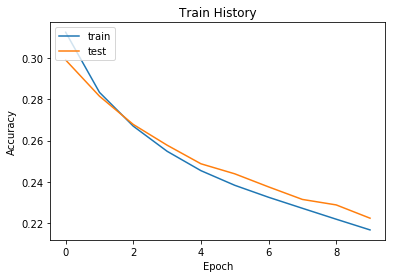

In [18]:
show_train_history('loss','val_loss')